In [2]:
#tensorflow and tf.keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
#helper libraries
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
cv2_imshow(train_images[2])

In [ ]:
import cv2

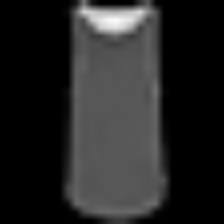

In [ ]:
cv2_imshow(cv2.resize(train_images[2],(0,0),fx=8,fy=8))

In [ ]:
train_labels[2]

0

In [ ]:
class_names[train_labels[2]]

'T-shirt/top'

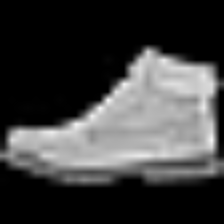

'Ankle boot'

In [ ]:
cv2_imshow(cv2.resize(train_images[89],(0,0),fx=8,fy=8))
class_names[train_labels[89]]

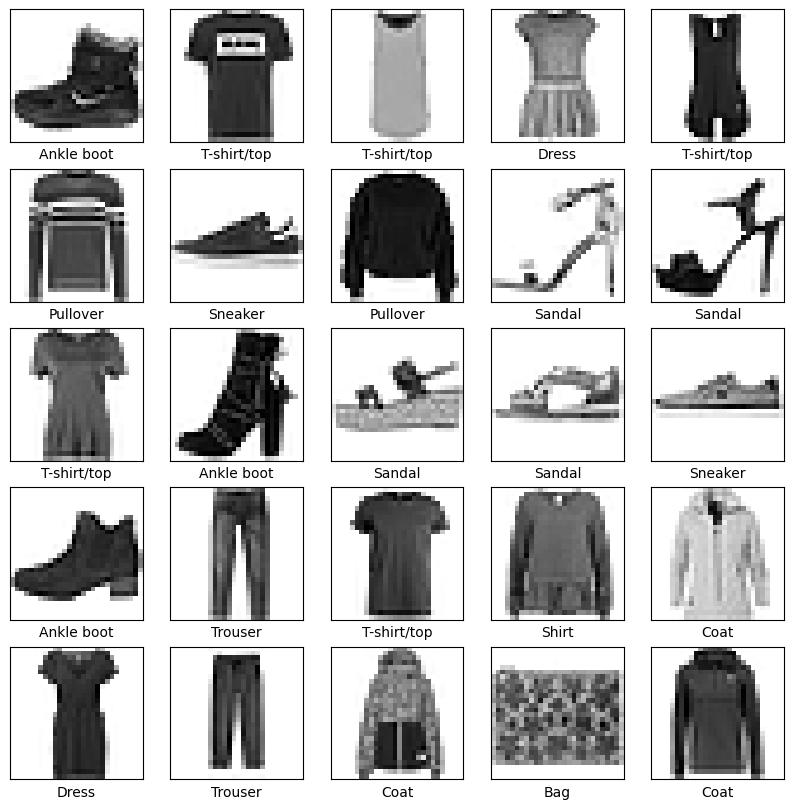

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6825 - loss: 10.9511
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7503 - loss: 0.6675
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8041 - loss: 0.5637
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8192 - loss: 0.5238
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8238 - loss: 0.5092
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8345 - loss: 0.4855
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8382 - loss: 0.4791
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8401 - loss: 0.4734
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8370 - loss: 0.4747
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8418 - loss: 0.4629


In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('\nTest accuracy', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8345 - loss: 0.5089

Test accuracy 0.8331999778747559


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
predictions[0]

array([8.2198407e-15, 3.3502573e-10, 2.4866059e-36, 9.0117774e-12,
       7.2887311e-25, 4.3070363e-03, 8.4320869e-23, 2.1579342e-02,
       8.8370068e-11, 9.7411364e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'orange'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('orange')



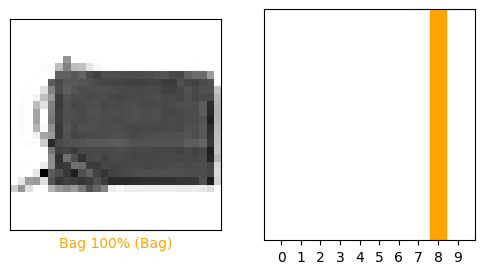

In [ ]:

    i=18
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i,predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i], test_labels)
    plt.show()


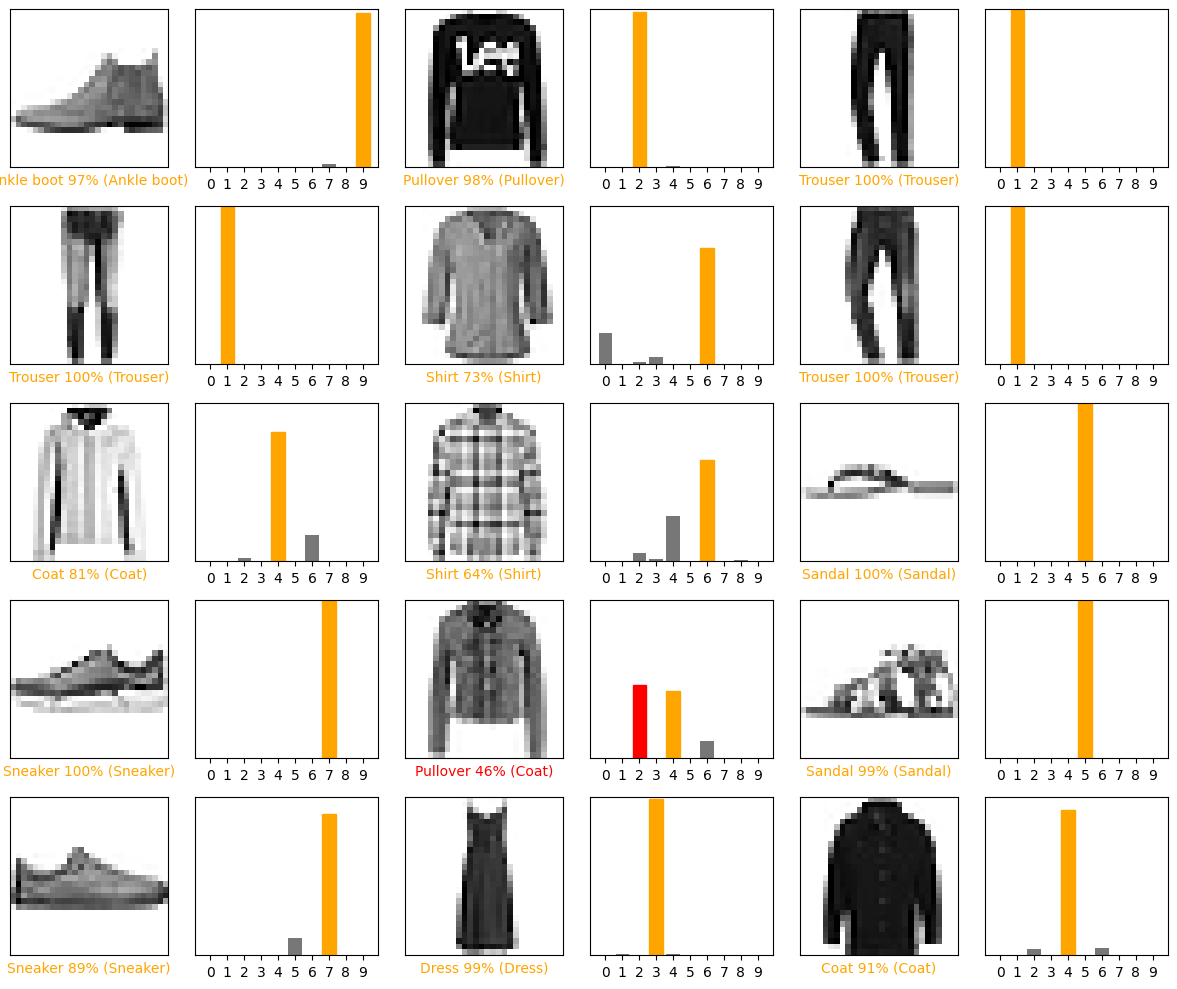

In [ ]:

    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols,2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols,2*i+1)

      plot_image(i, predictions[i], test_labels,test_images)
      plt.subplot(num_rows, 2*num_cols,2*i+2)
      plot_value_array(i,predictions[i], test_labels)
    plt.tight_layout()
    plt.show()

In [3]:
model = models.Sequential( )
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1),
                        padding='same'))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(layers.Conv2D(64,(3,3), activation='relu'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels)

SyntaxError: incomplete input (<ipython-input-8-39283daa8f67>, line 2)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:',test_acc)

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,282 (2.47 MB)

 Trainable params: 646,282 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0 ]

In [ ]:
#motor = cv2.imread('motor.jpg',0)

In [ ]:
#cv2_imshow(motor)

In [ ]:
cv2_imshow(test_images[0])

In [ ]:
cv2_imshow(cv2.bitwise_not(test_images[0]))

In [ ]:
new_test = cv2.resize(test_images[3],(28,28))

In [ ]:
print(new_test)

[[  0   0   0   0   0   0   0   0   0  21 123 108  99  99  84  83  86  92
   70   6   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 106 248 230 205 239 212 174 215 207
  139  93   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 216 213 205 214 214 193 229 201
  165  99   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 146 195 229 212 228 215 209 230 214
  164  54   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 115 193 227 209 217 209 212 206 224
  165  14   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 114 148 182 183 218 226 228 190 206
  131  10   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 112 119 106 105 189 208 251 165 139
  104  16   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  71 138  78  71 147  93 246 136 108
   87   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  81 127 102  85 147  97 25

In [ ]:
print(type(test_images))
print(test_images.shape)
print(type(new_test))
print(new_test.shape)
new_predictions = probability_model.predict(cv2.bitwise_not(new_test).reshape(1,28,28))

<class 'numpy.ndarray'>
(10000, 28, 28)
<class 'numpy.ndarray'>
(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
new_predictions = probability_model.predict(cv2.bitwise_not(test_images[0]).reshape(1,28,28))
class_names[np.argmax(new_predictions[0])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'Bag'

In [ ]:
sandal = cv2.imread('3-webp.jpg',0)
cv2_imshow(sandal)
new_test3 = cv2.resize(sandal,(28,28))
new_predictions = probability_model.predict(cv2.bitwise_not(new_test3).reshape(1,28,28))
print(class_names[np.argmax(new_predictions[0])])
cv2_imshow(cv2.bitwise_not(new_test3))

AttributeError: 'NoneType' object has no attribute 'clip'

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [ ]:
#dense

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)


print('\n test accuracy', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8332 - loss: 0.5267

 test accuracy 0.8331999778747559


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dense(10)])